<a href="https://colab.research.google.com/github/ZidanMau24/AMS_UTS_A12_2019_06289/blob/main/UTS_AMS_A12_2019_06289.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import string
import time
from copy import deepcopy
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/masaboe/ams-2022/main/uts-template/Dataset_Sentimen_Emosi.csv')

In [ ]:
df = df.drop(['Sentimen'], axis=1)

In [ ]:
df.head(10)

,Tweet,Emosi
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1
1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1
3,Covid belum nyampe prigen mbak hmm hoax,-2
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2
5,Pikir2 balik byk mnde plk nk setelkn lepas covid.,1
6,"Selamat pagi, hari jum'at. Jum'at keempat di k...",-1
7,"Hikmah di balik musibah covid-19, smg para pej...",-2
8,Cegah covid-19 beserta jajaran Polsek Kuranji ...,1
9,Ya Allah kami memohon pada mu perkenankanlah d...,-1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   904 non-null    object
 1   Emosi   904 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.2+ KB


In [ ]:
!pip install ekphrasis

In [ ]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis', 'censored'},
    annotate={"hashtag"},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

/usr/local/lib/python3.7/dist-packages/ekphrasis/classes/tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Word statistics files not found!
Downloading... done!
Unpacking... done!
Reading twitter - 1grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_1grams.txt
Reading twitter - 2grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_2grams.txt
Reading twitter - 1grams ...


/usr/local/lib/python3.7/dist-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


In [ ]:
# panggil ekphrasis

def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))

In [ ]:


def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')

def remove_space_alzami(text):
    return " ".join(text.split())

def remove_emoji_alzami(text):
    return ' '.join(re.sub("([x#][A-Za-z0-9]+)"," ", text).split())

def remove_tab(text):
    return text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")

def remove_tab2(text):
    return re.sub('\s+',' ',text)

def remove_rt(text):
    return text.replace('RT'," ")

def remove_mention(text):
    return ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

def remove_incomplete_url(text):
    return text.replace("http://", " ").replace("https://", " ")

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def remove_excessive_dot(text):
    return text.replace('..'," ")

def change_stripe(text):
    return text.replace('-'," ")

def lower(text):
    return text.lower()

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def remove_excessive_dot(text):
    return text.replace('..'," ")

def lower(text):
    return text.lower()

def remove_whitespace_LT(text):
    return text.strip()

def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

def remove_punctuation(text):
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    return re.sub(pattern, "", text)

In [ ]:
# hapus untuk <>
def remove_number_eks(text):
    return text.replace('<number>'," ")

def remove_angka(text):
    return re.sub(r"\d+", "", text) 

def remove_URL_eks(text):
    return text.replace('URL'," ").replace('url'," ")

def space_punctuation(text):
    return re.sub('(?<! )(?=[.,!?()])|(?<=[.,!?()])(?! )', r' ', text)

In [ ]:
i = 0
final_string = []
s = ""
for text in df['Tweet'].values:
    filteredSentence = []
    EachReviewText = ""
    proc = remove_rt(text)
    proc = lower(proc)
    proc = change_stripe(proc)
    proc = remove_emoji_alzami(proc)
    proc = remove_tab(proc)
    proc = remove_tab2(proc)
    proc = non_ascii(proc)
    proc = remove_incomplete_url(proc)
    proc = remove_excessive_dot(proc)
    proc = remove_whitespace_LT(proc)
    proc = remove_whitespace_multiple(proc)
    proc = remove_single_char(proc)
    proc = space_punctuation(proc)
    proc = remove_punctuation(proc)
    proc = remove_space_alzami(proc)
    proc = bersih_data(proc)
    proc = remove_number_eks(proc)
    proc = remove_angka(proc) 
    proc = remove_URL_eks(proc)
    EachReviewText = proc
    final_string.append(EachReviewText)

In [ ]:
df["step01"] = final_string

In [ ]:
df.head(10)

,Tweet,Emosi,step01
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1,cegah mata rantai covid mari kita dirumah sa...
1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1,aku mohon yaallah semoga wabah covid menghil...
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1,pemprov papua naikkan status jadi tanggap daru...
3,Covid belum nyampe prigen mbak hmm hoax,-2,covid belum nyampe prigen mbak hmm hoax
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2,nyuruh orang pintar lu aja togog itu kerumunan...
5,Pikir2 balik byk mnde plk nk setelkn lepas covid.,1,pikir balik byk mnde plk nk setelkn lepas covid
6,"Selamat pagi, hari jum'at. Jum'at keempat di k...",-1,selamat pagi hari jumat jumat keempat di kala ...
7,"Hikmah di balik musibah covid-19, smg para pej...",-2,hikmah di balik musibah covid smg para pejab...
8,Cegah covid-19 beserta jajaran Polsek Kuranji ...,1,cegah covid beserta jajaran polsek kuranji m...
9,Ya Allah kami memohon pada mu perkenankanlah d...,-1,ya allah kami memohon pada mu perkenankanlah d...


In [ ]:
##hapus data kosong
df_hapus = df[~df['step01'].str.contains(" ")]
df_hapus.info()
df_hapus.head(10)
df_new = df[~df.isin(df_hapus)].dropna()
df_new.info()
df_new

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 78 to 78
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   1 non-null      object
 1   Emosi   1 non-null      int64 
 2   step01  1 non-null      object
dtypes: int64(1), object(2)
memory usage: 32.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 0 to 903
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tweet   903 non-null    object 
 1   Emosi   903 non-null    float64
 2   step01  903 non-null    object 
dtypes: float64(1), object(2)
memory usage: 28.2+ KB


,Tweet,Emosi,step01
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...
1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid menghil...
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...
3,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2.0,nyuruh orang pintar lu aja togog itu kerumunan...
...,...,...,...
899,Seluruh negara di dunia mengalami masa sulit k...,-2.0,seluruh negara di dunia mengalami masa sulit k...
900,"Setelah covid dan skripsi disaster selesai, ma...",2.0,setelah covid dan skripsi disaster selesai mau...
901,"Malam ini!! Projek ""BENDA BOLEH BINCANG"" 9 mal...",1.0,malam ini projek benda boleh bincang malam d...
902,Pontang - panting di koyak covid 19,-2.0,pontang panting di koyak covid


In [ ]:
##pembersihan slank word
import nltk
from nltk.tokenize import word_tokenize 

In [ ]:
def word_tokenize_wrapper(text):
  return word_tokenize(text)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df_new['tokens'] = df['step01'].apply(word_tokenize_wrapper)

In [ ]:
df_new.head(10)

,Tweet,Emosi,step01,tokens
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...,"[cegah, mata, rantai, covid, mari, kita, dirum..."
1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid menghil...,"[aku, mohon, yaallah, semoga, wabah, covid, me..."
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga..."
3,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax,"[covid, belum, nyampe, prigen, mbak, hmm, hoax]"
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2.0,nyuruh orang pintar lu aja togog itu kerumunan...,"[nyuruh, orang, pintar, lu, aja, togog, itu, k..."
5,Pikir2 balik byk mnde plk nk setelkn lepas covid.,1.0,pikir balik byk mnde plk nk setelkn lepas covid,"[pikir, balik, byk, mnde, plk, nk, setelkn, le..."
6,"Selamat pagi, hari jum'at. Jum'at keempat di k...",-1.0,selamat pagi hari jumat jumat keempat di kala ...,"[selamat, pagi, hari, jumat, jumat, keempat, d..."
7,"Hikmah di balik musibah covid-19, smg para pej...",-2.0,hikmah di balik musibah covid smg para pejab...,"[hikmah, di, balik, musibah, covid, smg, para,..."
8,Cegah covid-19 beserta jajaran Polsek Kuranji ...,1.0,cegah covid beserta jajaran polsek kuranji m...,"[cegah, covid, beserta, jajaran, polsek, kuran..."
9,Ya Allah kami memohon pada mu perkenankanlah d...,-1.0,ya allah kami memohon pada mu perkenankanlah d...,"[ya, allah, kami, memohon, pada, mu, perkenank..."


In [ ]:
normalized_word = pd.read_csv('https://raw.githubusercontent.com/masaboe/ams-2022/main/textProcessing/kamus_clean.csv')

In [ ]:
normalized_word.head

<bound method NDFrame.head of        Unnamed: 0    TIDAK BAKU                               BAKU
0               0       mangtab                              bagus
1               1   evolusionis                       revolusioner
2               6      abstarck                            abstrak
3               7  sebenenarnya                         sebenarnya
4               8   kataakanlah                         katakanlah
...           ...           ...                                ...
15017       16016     mendikbud  menteri pendidikan dan kebudayaan
15018       16017        mendag                menteri perdagangan
15019       16018       menaker               menteri tenaga kerja
15020       16019      memetwit                            mentwit
15021       16020      megangin                           memegang

[15022 rows x 3 columns]>

In [ ]:
normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

In [ ]:
df_new['final_tokens'] = df_new['tokens'].apply(normalized_term)

In [ ]:
i=0
final_string_tokens = []
for text in df_new['final_tokens'].values:
    EachReviewText = ""
    EachReviewText = ' '.join(text)
    final_string_tokens.append(EachReviewText)

In [ ]:
df_new["step02"] = final_string_tokens

In [ ]:
df_new.head(10)

,Tweet,Emosi,step01,tokens,final_tokens,step02
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...,"[cegah, mata, rantai, covid, mari, kita, dirum...","[cegah, mata, rantai, covid, mari, kita, dirum...",cegah mata rantai covid mari kita dirumah saja...
1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid menghil...,"[aku, mohon, yaallah, semoga, wabah, covid, me...","[aku, mohon, yaallah, semoga, wabah, covid, me...",aku mohon yaallah semoga wabah covid menghilan...
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, jadi, tangga...",pemprov papua naikkan status jadi tanggap daru...
3,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax,"[covid, belum, nyampe, prigen, mbak, hmm, hoax]","[covid, belum, nyampe, prigen, mbak, hmm, hoax]",covid belum nyampe prigen mbak hmm hoax
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2.0,nyuruh orang pintar lu aja togog itu kerumunan...,"[nyuruh, orang, pintar, lu, aja, togog, itu, k...","[nyuruh, orang, pintar, lu, aja, togog, itu, k...",nyuruh orang pintar lu aja togog itu kerumunan...
5,Pikir2 balik byk mnde plk nk setelkn lepas covid.,1.0,pikir balik byk mnde plk nk setelkn lepas covid,"[pikir, balik, byk, mnde, plk, nk, setelkn, le...","[pikir, balik, byk, mnde, plk, nk, setelkn, le...",pikir balik byk mnde plk nk setelkn lepas covid
6,"Selamat pagi, hari jum'at. Jum'at keempat di k...",-1.0,selamat pagi hari jumat jumat keempat di kala ...,"[selamat, pagi, hari, jumat, jumat, keempat, d...","[selamat, pagi, hari, jumat, jumat, keempat, d...",selamat pagi hari jumat jumat keempat di kala ...
7,"Hikmah di balik musibah covid-19, smg para pej...",-2.0,hikmah di balik musibah covid smg para pejab...,"[hikmah, di, balik, musibah, covid, smg, para,...","[hikmah, di, balik, musibah, covid, smg, para,...",hikmah di balik musibah covid smg para pejabat...
8,Cegah covid-19 beserta jajaran Polsek Kuranji ...,1.0,cegah covid beserta jajaran polsek kuranji m...,"[cegah, covid, beserta, jajaran, polsek, kuran...","[cegah, covid, beserta, jajaran, polsek, kuran...",cegah covid beserta jajaran polsek kuranji mel...
9,Ya Allah kami memohon pada mu perkenankanlah d...,-1.0,ya allah kami memohon pada mu perkenankanlah d...,"[ya, allah, kami, memohon, pada, mu, perkenank...","[ya, allah, kami, memohon, pada, mu, perkenank...",ya allah kami memohon pada mu perkenankanlah d...


In [ ]:
df_new.to_csv('clean_dataset_uts_part01.csv',sep=";")

Stemming menggunakan sastrawi

In [ ]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.4 MB/s 


In [ ]:
!pip install pysastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 210 kB 5.1 MB/s 


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
 
factory = StopWordRemoverFactory()

more_stopword = ['sih', 'nya','rt','loh','lah', 'dd', 'mah', 'nye', 'eh', 'ehh', 'ah', 'yang','yg']
 
# Tambahkan Stopword Baru
data = factory.get_stop_words()+more_stopword

stopwords_sastrawi = factory.create_stop_word_remover()

dictionary = ArrayDictionary(data)
str_stopwords = StopWordRemover(dictionary)

In [ ]:
df_new['step02'] = df_new['step02'].apply(str)

In [ ]:
df_new.head(3)

,Tweet,Emosi,step01,tokens,final_tokens,step02
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...,"[cegah, mata, rantai, covid, mari, kita, dirum...","[cegah, mata, rantai, covid, mari, kita, dirum...",cegah mata rantai covid mari kita dirumah saja...
1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid menghil...,"[aku, mohon, yaallah, semoga, wabah, covid, me...","[aku, mohon, yaallah, semoga, wabah, covid, me...",aku mohon yaallah semoga wabah covid menghilan...
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, jadi, tangga...",pemprov papua naikkan status jadi tanggap daru...


In [ ]:
i=0
final_string = []
s = ""
for sentence in df_new["step02"].values:
    filteredSentence = []
    EachReviewText = ""
    st = stopwords_sastrawi.remove(sentence)
    s = (stemmer.stem(st))
    filteredSentence.append(s)
    
    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

In [ ]:
df_new.loc[:, ('ProcessedText')] = final_string

In [ ]:
df_new.head()

,Tweet,Emosi,step01,tokens,final_tokens,step02,ProcessedText
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...,"[cegah, mata, rantai, covid, mari, kita, dirum...","[cegah, mata, rantai, covid, mari, kita, dirum...",cegah mata rantai covid mari kita dirumah saja...,cegah rantai covid mari rumah minggu
1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid menghil...,"[aku, mohon, yaallah, semoga, wabah, covid, me...","[aku, mohon, yaallah, semoga, wabah, covid, me...",aku mohon yaallah semoga wabah covid menghilan...,yaallah moga wabah covid hilang ramadhan
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, jadi, tangga...",pemprov papua naikkan status jadi tanggap daru...,pemprov papua naik status tanggap darurat covi...
3,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax,"[covid, belum, nyampe, prigen, mbak, hmm, hoax]","[covid, belum, nyampe, prigen, mbak, hmm, hoax]",covid belum nyampe prigen mbak hmm hoax,covid nyampe prigen mbak hmm hoax
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2.0,nyuruh orang pintar lu aja togog itu kerumunan...,"[nyuruh, orang, pintar, lu, aja, togog, itu, k...","[nyuruh, orang, pintar, lu, aja, togog, itu, k...",nyuruh orang pintar lu aja togog itu kerumunan...,nyuruh pintar lu aja togog kerumun nularin cov...


In [ ]:
df_new.to_csv('clean_dataset_uts_part02.csv',sep=";")

## Tahap modelling

In [ ]:
dataset_feature = df_new['ProcessedText']

In [ ]:
dataset_label = df_new['Emosi']

In [ ]:
dataset_label

0      1.0
1     -1.0
2      1.0
3     -2.0
4     -2.0
      ... 
899   -2.0
900    2.0
901    1.0
902   -2.0
903   -2.0
Name: Emosi, Length: 903, dtype: float64

In [ ]:
dataset_label.value_counts()

 1.0    300
-1.0    245
-2.0    201
 2.0    157
Name: Emosi, dtype: int64

In [ ]:
dataset_label.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

 1.0    33.2%
-1.0    27.1%
-2.0    22.3%
 2.0    17.4%
Name: Emosi, dtype: object

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 864x576 with 0 Axes>

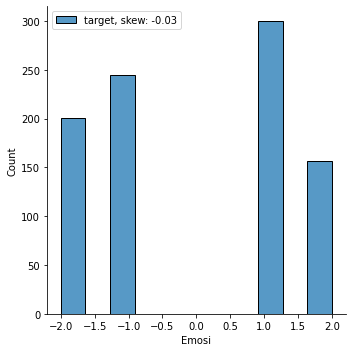

In [ ]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.displot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

Kesimpulan dataset : distribusi label pada dataset terdistribusi dengan rata atau tidak ditemukanya underfitting atau overfititng yang terlalu mencolok

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
positive_low_reviews = df_new[(df_new["Emosi"] == 1)]
negative_low_reviews = df_new[(df_new["Emosi"] == -1)]
positive_high_reviews = df_new[(df_new["Emosi"] == 2)]
negative_high_reviews = df_new[(df_new["Emosi"] == -2)]

##cek positive low

In [ ]:

positive_low_reviews.head()

,Tweet,Emosi,step01,tokens,final_tokens,step02,ProcessedText
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...,"[cegah, mata, rantai, covid, mari, kita, dirum...","[cegah, mata, rantai, covid, mari, kita, dirum...",cegah mata rantai covid mari kita dirumah saja...,cegah rantai covid mari rumah minggu
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, jadi, tangga...",pemprov papua naikkan status jadi tanggap daru...,pemprov papua naik status tanggap darurat covi...
5,Pikir2 balik byk mnde plk nk setelkn lepas covid.,1.0,pikir balik byk mnde plk nk setelkn lepas covid,"[pikir, balik, byk, mnde, plk, nk, setelkn, le...","[pikir, balik, byk, mnde, plk, nk, setelkn, le...",pikir balik byk mnde plk nk setelkn lepas covid,pikir byk mnde plk nk setelkn lepas covid
8,Cegah covid-19 beserta jajaran Polsek Kuranji ...,1.0,cegah covid beserta jajaran polsek kuranji m...,"[cegah, covid, beserta, jajaran, polsek, kuran...","[cegah, covid, beserta, jajaran, polsek, kuran...",cegah covid beserta jajaran polsek kuranji mel...,cegah covid serta jajar polsek ranji aksi pedu...
15,"Ada 15 cara menyuruh Covid-19 segera pergi, Ja...",1.0,ada cara menyuruh covid segera pergi jaga ...,"[ada, cara, menyuruh, covid, segera, pergi, ja...","[ada, cara, menyuruh, covid, segera, pergi, ja...",ada cara menyuruh covid segera pergi jaga kebe...,suruh covid pergi jaga bersih tertib covid did...


In [ ]:
Positive_1_tf_idf_vect = TfidfVectorizer(ngram_range=(2,2))
Positive_1_tf_idf = Positive_1_tf_idf_vect.fit_transform(positive_low_reviews["ProcessedText"].values)

In [ ]:
Positive_1_tf_idf.shape

(300, 2842)

In [ ]:
features = Positive_1_tf_idf_vect.get_feature_names()

idfValues = Positive_1_tf_idf_vect.idf_

d = dict(zip(features, 9 - idfValues))

sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

for i in range(200):
    print(sortedDict[i])

('sebar covid', 5.47094356559907)
('virus covid', 5.288622008805115)
('sebar virus', 5.237328714417565)
('virus corona', 5.237328714417565)
('cegah covid', 5.12610307930734)
('cegah sebar', 5.12610307930734)
('corona covid', 5.12610307930734)
('pandemi covid', 4.7777963850391245)
('dampak covid', 4.59547482824517)
('gugus tugas', 4.490114312587344)
('pasien covid', 4.490114312587344)
('cuci tangan', 4.372331276930961)
('jaga jarak', 4.372331276930961)
('positif covid', 4.372331276930961)
('putus rantai', 4.372331276930961)
('tular covid', 4.372331276930961)
('cegah tular', 4.238799884306438)
('covid kabupaten', 4.238799884306438)
('covid ni', 4.238799884306438)
('tangan covid', 4.238799884306438)
('wabah covid', 4.238799884306438)
('antisipasi sebar', 4.084649204479179)
('atas dampak', 4.084649204479179)
('bagi masker', 4.084649204479179)
('cegah virus', 4.084649204479179)
('jaga sehat', 4.084649204479179)
('lawan covid', 4.084649204479179)
('maklumat kapolri', 4.084649204479179)
('pak

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [ ]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

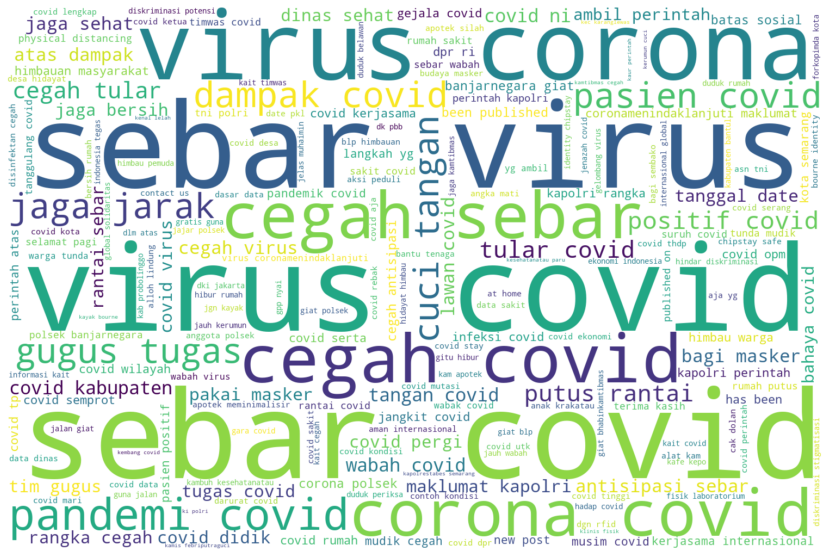

In [ ]:
PlotWordCloud(d)

##Positive HIGH

In [ ]:
##cek positive high
positive_high_reviews.head()

,Tweet,Emosi,step01,tokens,final_tokens,step02,ProcessedText
10,"Sah.. Cegah Covid-19 Meluas, Pemerintah Revisi...",2.0,sah cegah covid meluas pemerintah revisi har...,"[sah, cegah, covid, meluas, pemerintah, revisi...","[sah, cegah, covid, meluas, pemerintah, revisi...",sah cegah covid meluas pemerintah revisi hari ...,sah cegah covid luas perintah revisi libur cuti
11,Bencana Nasional Covid-19; DPRD Indramayu Mint...,2.0,bencana nasional covid dprd indramayu minta ...,"[bencana, nasional, covid, dprd, indramayu, mi...","[bencana, nasional, covid, dprd, indramayu, mi...",bencana nasional covid dprd indramayu minta bu...,bencana nasional covid dprd indramayu bumd rin...
14,Skrinews - Pdt. JIMMY: MARI BERSAMA MEMERANGI ...,2.0,skrinews pdt jimmy mari bersama memerangi viru...,"[skrinews, pdt, jimmy, mari, bersama, memerang...","[skrinews, pdt, jimmy, mari, bersama, memerang...",skrinews pdt jimmy mari bersama memerangi viru...,skrinews pdt jimmy mari rang virus corona covi...
21,"Temanggung, Jawa Tengah...anggota gugus tugas ...",2.0,temanggung jawa tengah anggota gugus tugas cov...,"[temanggung, jawa, tengah, anggota, gugus, tug...","[temanggung, jawa, tengah, anggota, gugus, tug...",temanggung jawa tengah anggota gugus tugas cov...,tanggung jawa tengah anggota gugus tugas covid...
33,Amalkan langkah-langkah pencegahan penularan C...,2.0,amalkan langkah langkah pencegahan penularan c...,"[amalkan, langkah, langkah, pencegahan, penula...","[amalkan, langkah, langkah, pencegahan, penula...",amalkan langkah langkah pencegahan penularan c...,amal langkah langkah cegah tular covid amal hi...


In [ ]:
Positive_2_tf_idf_vect = TfidfVectorizer(ngram_range=(2,2))
Positive_2_tf_idf = Positive_2_tf_idf_vect.fit_transform(positive_high_reviews["ProcessedText"].values)

In [ ]:
Positive_2_tf_idf.shape

(157, 1470)

In [ ]:
features = Positive_2_tf_idf_vect.get_feature_names()

idfValues = Positive_2_tf_idf_vect.idf_

d = dict(zip(features, 9 - idfValues))

sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

for i in range(200):
    print(sortedDict[i])

('pandemi covid', 5.770618311029249)
('lawan covid', 5.50235432443457)
('corona covid', 5.335300239771404)
('sebar covid', 5.239990059967079)
('virus corona', 5.239990059967079)
('sebar virus', 5.016846508652869)
('virus covid', 5.016846508652869)
('wabah covid', 5.016846508652869)
('cegah sebar', 4.883315116028347)
('dampak covid', 4.883315116028347)
('gugus tugas', 4.7291644362010885)
('masyarakat dampak', 4.7291644362010885)
('bantu apd', 4.546842879407134)
('covid indonesia', 4.546842879407134)
('lawan corona', 4.546842879407134)
('putus rantai', 4.546842879407134)
('salur bantu', 4.546842879407134)
('satu lawan', 4.546842879407134)
('tangan covid', 4.546842879407134)
('cegah covid', 4.323699328092924)
('hms itenas', 4.323699328092924)
('itenas bandung', 4.323699328092924)
('lengkap medis', 4.323699328092924)
('mari lawan', 4.323699328092924)
('tengah pandemi', 4.323699328092924)
('terima kasih', 4.323699328092924)
('tim medis', 4.323699328092924)
('tugas covid', 4.323699328092924)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

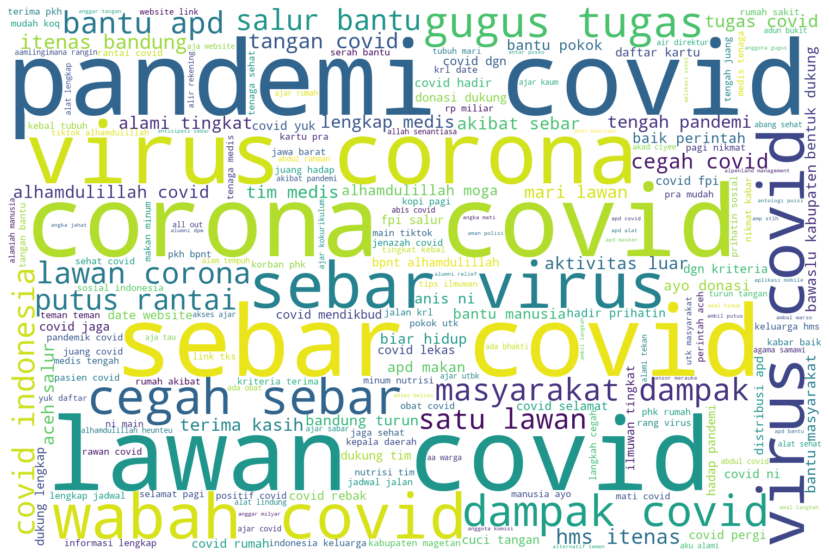

In [ ]:
PlotWordCloud(d)

#Negative low

In [ ]:
negative_low_reviews.head()

,Tweet,Emosi,step01,tokens,final_tokens,step02,ProcessedText
1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid menghil...,"[aku, mohon, yaallah, semoga, wabah, covid, me...","[aku, mohon, yaallah, semoga, wabah, covid, me...",aku mohon yaallah semoga wabah covid menghilan...,yaallah moga wabah covid hilang ramadhan
6,"Selamat pagi, hari jum'at. Jum'at keempat di k...",-1.0,selamat pagi hari jumat jumat keempat di kala ...,"[selamat, pagi, hari, jumat, jumat, keempat, d...","[selamat, pagi, hari, jumat, jumat, keempat, d...",selamat pagi hari jumat jumat keempat di kala ...,selamat pagi jumat jumat empat pandemi covid m...
9,Ya Allah kami memohon pada mu perkenankanlah d...,-1.0,ya allah kami memohon pada mu perkenankanlah d...,"[ya, allah, kami, memohon, pada, mu, perkenank...","[ya, allah, kami, memohon, pada, mu, perkenank...",ya allah kami memohon pada mu perkenankanlah d...,allah mohon mu kenan doa doa rana sungguh engk...
12,"Cegah Covid-19, Pemprov dan FKUB Papua Barat S...",-1.0,cegah covid pemprov dan fkub papua barat sep...,"[cegah, covid, pemprov, dan, fkub, papua, bara...","[cegah, covid, pemprov, dan, fkub, papua, bara...",cegah covid pemprov dan fkub papua barat sepak...,cegah covid pemprov fkub papua barat sepakat a...
23,Btw long weekend ni pada mau kemana... Dulu se...,-1.0,btw long weekend ni pada mau kemana dulu sebel...,"[btw, long, weekend, ni, pada, mau, kemana, du...","[btw, long, weekend, ni, pada, mau, kemana, du...",btw long weekend ni pada mau kemana dulu sebel...,btw long weekend ni mana si covid long weekend...


In [ ]:
Negative_1_tf_idf_vect = TfidfVectorizer(ngram_range=(2,2))
Negative_1_tf_idf = Negative_1_tf_idf_vect.fit_transform(negative_low_reviews["ProcessedText"].values)

In [ ]:
Negative_1_tf_idf.shape

(245, 2573)

In [ ]:
features = Negative_1_tf_idf_vect.get_feature_names()

idfValues = Negative_1_tf_idf_vect.idf_

d = dict(zip(features, 9 - idfValues))

sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

for i in range(200):
    print(sortedDict[i])

In [ ]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

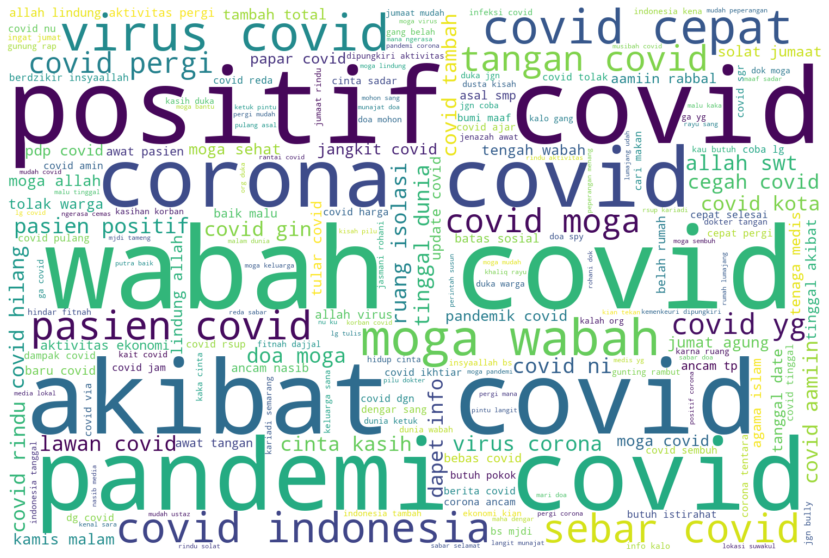

In [ ]:
PlotWordCloud(d)

##Negative High

In [ ]:
negative_high_reviews.head()

In [ ]:
Negative_2_tf_idf_vect = TfidfVectorizer(ngram_range=(2,2))
Negative_2_tf_idf = Negative_2_tf_idf_vect.fit_transform(negative_high_reviews["ProcessedText"].values)

In [ ]:
Negative_2_tf_idf.shape

(201, 2552)

In [ ]:
features = Negative_2_tf_idf_vect.get_feature_names()

idfValues = Negative_2_tf_idf_vect.idf_

d = dict(zip(features, 9 - idfValues))

sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

for i in range(200):
    print(sortedDict[i])

('wabah covid', 5.330789632214054)
('positif covid', 4.888956879935014)
('pandemi covid', 4.771173844278631)
('dampak covid', 4.637642451654108)
('makam jenazah', 4.637642451654108)
('nolak jenazah', 4.637642451654108)
('pasien covid', 4.637642451654108)
('tangan covid', 4.637642451654108)
('virus corona', 4.637642451654108)
('berita covid', 4.48349177182685)
('covid ni', 4.48349177182685)
('jenazah pasien', 4.48349177182685)
('korban covid', 4.48349177182685)
('tolak makam', 4.48349177182685)
('yg nolak', 4.48349177182685)
('corona covid', 4.301170215032895)
('covid tinggal', 4.301170215032895)
('jenazah covid', 4.301170215032895)
('tengah wabah', 4.301170215032895)
('virus covid', 4.301170215032895)
('yg covid', 4.301170215032895)
('awat yg', 4.078026663718686)
('bangun tidur', 4.078026663718686)
('bebas alas', 4.078026663718686)
('bebas tengah', 4.078026663718686)
('covid jg', 4.078026663718686)
('covid kalo', 4.078026663718686)
('covid koruptor', 4.078026663718686)
('covid tdk', 4.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

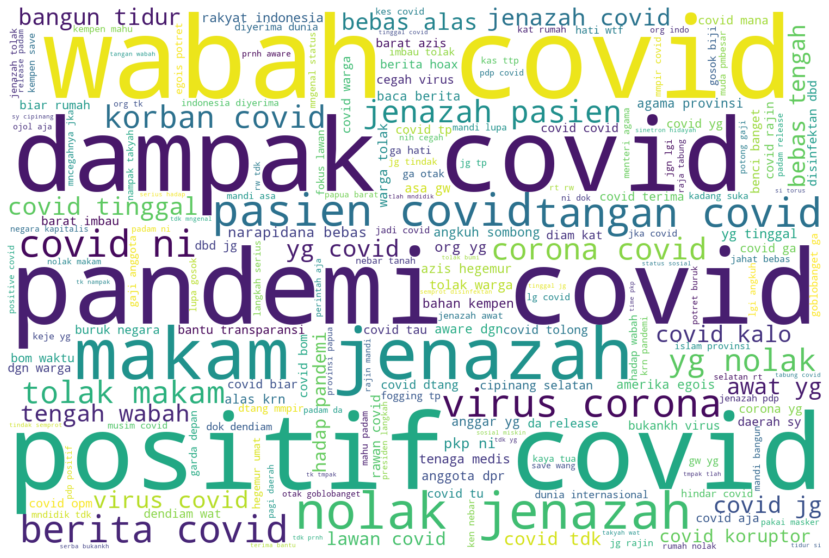

In [ ]:
PlotWordCloud(d)

##Emosi semua label





In [ ]:
df_new["Emosi"]

0      1.0
1     -1.0
2      1.0
3     -2.0
4     -2.0
      ... 
899   -2.0
900    2.0
901    1.0
902   -2.0
903   -2.0
Name: Emosi, Length: 903, dtype: float64

In [ ]:
tfidf_vect = TfidfVectorizer(ngram_range = (1,2))

In [ ]:
Data_TFIDF = tfidf_vect.fit_transform(df_new["ProcessedText"].values)

In [ ]:
Data_TFIDF.shape

(903, 12340)

###Training Data 70-30

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [ ]:
train_TFIDF, test_TFIDF, train_labels_TFIDF, test_labels_TFIDF = train_test_split(dataset_feature, dataset_label, test_size = 0.3, random_state=42)

In [ ]:
train_TFIDF

468    anggota polsek koba himbau pemuda kumpul kumpu...
450    juru bicara umum nominasi harga covid asal clu...
440    info bagi daerah update kondisi kini tangan co...
399    kalo sebab non covid kalo gasalah hadir org ba...
300    alhamdulillah moga abang sehat moga indonesia ...
                             ...                        
107    min lpdp ttp nggk yaa min dana didik ahli tang...
271    pakai masker main yoyo mu potret sd vita schoo...
861    angka positif covid tembus perintah masyarakat...
436    pergub dki jakarta laksana psbb tangan covid p...
103               pandemi corona ancam nasib media lokal
Name: ProcessedText, Length: 632, dtype: object

##NAIVE BAYES

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_Vectorizer = TfidfVectorizer()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier_nb = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

In [ ]:
from sklearn.pipeline import Pipeline
classifier_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

In [ ]:
parameters_nb = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
    'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100)
}

In [ ]:
classifier_nb = GridSearchCV(classifier_nb, parameters_nb, cv = 3, n_jobs=-1)

In [ ]:
classifier_nb.fit(train_TFIDF, train_labels_TFIDF.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]})

In [ ]:
##accuracy
y_pred_nb_train = classifier_nb.predict(train_x)
accuracy_nb_train = accuracy_score(train_label, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_x)
accuracy_nb_test = accuracy_score(test_label, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)

Accuracy Training set:  0.8259493670886076
Accuracy Test set:  0.8154981549815498


In [ ]:
##recall
recall_nb_train = recall_score(train_label, y_pred_nb_train, average='weighted')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(test_label, y_pred_nb_test, average='weighted')
print("Recall Test set: ", recall_nb_test)

Recall Training set:  0.8259493670886076
Recall Test set:  0.8154981549815498


In [ ]:
##Precision
precision_nb_train = precision_score(train_label, y_pred_nb_train, average='weighted')
print("Precision Training set: ", precision_nb_train)

precision_nb_test = precision_score(test_label, y_pred_nb_test, average='weighted')
print("Precision Test set: ", precision_nb_test)

Precision Training set:  0.8315857512583141
Precision Test set:  0.8188117175289401


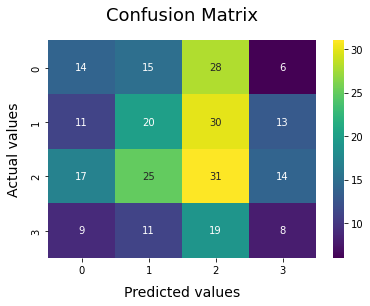

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_labels_TFIDF, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

##Visualisasi

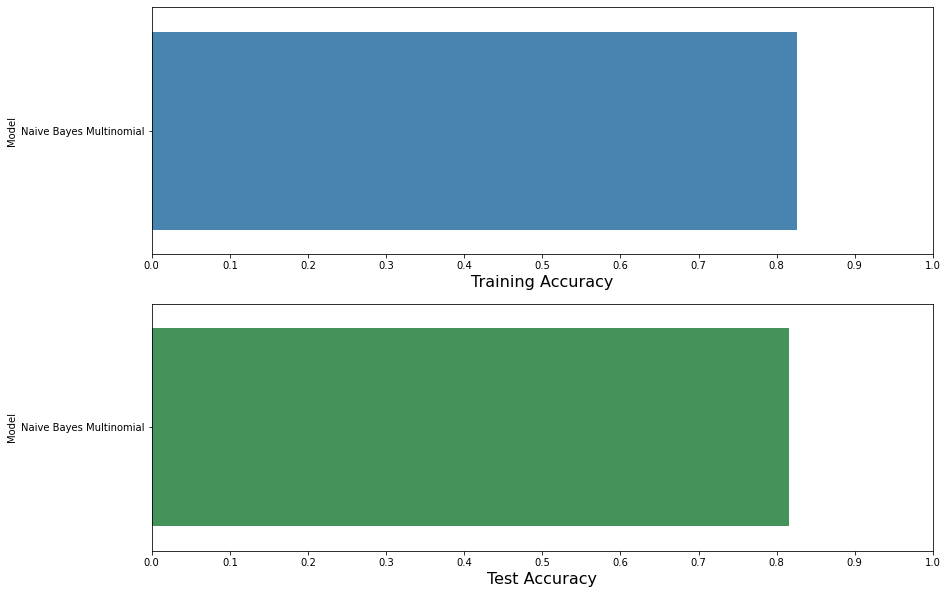

In [ ]:
models = [
          ('Naive Bayes Multinomial', accuracy_nb_train, accuracy_nb_test),                    
         ]
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict
models_comparison = [
                        ('Naive Bayes Multinomial', accuracy_nb_test, recall_nb_test, precision_nb_test),                          
                    ]
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()